In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
data = pd.read_csv("C:\\Users\\Ishaan Verma\\Desktop\\weatherAUS.csv")
data = data.dropna()
X = data.select_dtypes(np.number)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X.shape)

(56420, 16)


In [10]:
def initialize_centers(X, k):
    centers = X[np.random.choice(range(X.shape[0]),k,False)]
    return centers

In [11]:

    
def assign_clusters(X, centers):
    distances = np.linalg.norm(X[:, np.newaxis, :] - centers, axis=2)
    return np.argmin(distances, axis=1)


def update_centers(X, clusters, k):
    centers = np.zeros((k, X.shape[1]))
    for i in range(k):
        centers[i] = np.mean(X[clusters == i], axis=0)
    return centers


def kmeans(X, k, max_iters=100):
    centers = initialize_centers(X, k)
    for _ in range(max_iters):
        clusters = assign_clusters(X, centers)
        new_centers = update_centers(X, clusters, k)
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, clusters

In [12]:
def find_optimal_k(X, max_k):
    distortions = []
    for k in range(1, max_k + 1):
        _, clusters = kmeans(X, k)
        distortion = 0
        for i in range(k):
            distortion += np.sum(np.linalg.norm(X[clusters == i] - np.mean(X[clusters == i], axis=0), axis=1))
        distortions.append(distortion)
    plt.plot(range(1, max_k + 1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Method')
    plt.show()

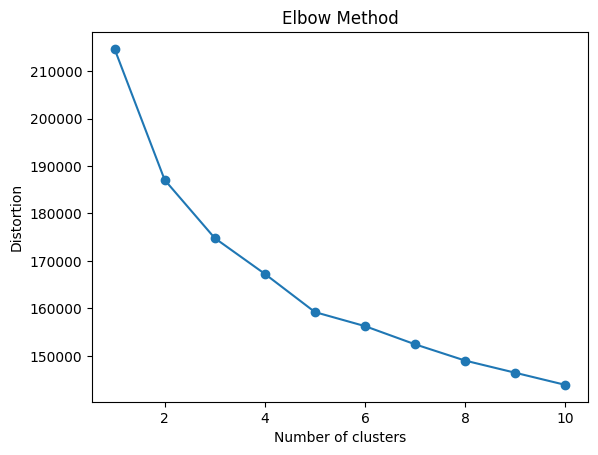

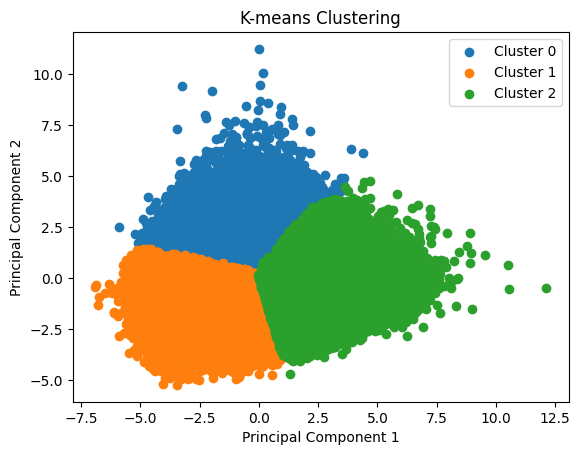

Cluster Centers:
[[ 0.1258513  -0.41808273  0.51801156 -0.25943343 -0.91512367  0.6229123
   0.45317677  0.45615697  0.51196941  0.78628638 -0.6323689  -0.4978237
   0.78338075  0.79466231 -0.1480084  -0.4776625 ]
 [-0.84889435 -0.71438687 -0.17203709 -0.62149546 -0.04861554 -0.56185387
  -0.41389767 -0.46432906  0.3254221   0.01631619  0.89880726  0.90150512
  -0.11824717 -0.10670866 -0.82846363 -0.6698287 ]
 [ 0.67287071  0.94583096 -0.22040415  0.7473008   0.70666495  0.05445611
   0.04424524  0.08747653 -0.66375904 -0.58426551 -0.3508764  -0.45076817
  -0.46104865 -0.47960602  0.85286434  0.94888611]]


In [15]:
def visualize_clusters(X, clusters):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    for i in np.unique(clusters):
        plt.scatter(X_pca[clusters == i, 0], X_pca[clusters == i, 1], label=f'Cluster {i}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('K-means Clustering')
    plt.legend()
    plt.show()




find_optimal_k(X_scaled, max_k=10)

optimal_k = 3
centers, clusters = kmeans(X_scaled, optimal_k)
visualize_clusters(X_scaled, clusters)
print("Cluster Centers:")
print(centers)